###  Setting

In [1]:
MOUNT_PATH = "/run/user/1000/gvfs/smb-share:server=azlab-fs01.local,share=東研究室/個人work/富井/"

In [2]:
MODEL_PATH = MOUNT_PATH + "PYUSCT_model/clf/"
model_name = "clf_l2_LR"

In [3]:
%ls $MODEL_PATH

clf_GPC_rbf_iso_t100_r128.pkl*    clf_GPC_rbf_iso_T8_t100_r64.pkl*
clf_GPC_rbf_iso_t100_r64.pkl*     clf_GPC_rbf_iso_time100.pkl*
clf_GPC_rbf_iso_T32.pkl*          clf_l2_LR_T32.pkl*
clf_GPC_rbf_iso_T4_t100_r64.pkl*


### Load model

In [4]:
model_version = "_T32"

In [5]:
from sklearn.externals import joblib

In [6]:
model_clf= joblib.load(MODEL_PATH + model_name + model_version + ".pkl")

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [8]:
model_clf

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.01,
          verbose=0, warm_start=False)

### Load data

In [9]:
import numpy as np
from os import listdir
from os.path import isfile, join

In [10]:
DATA_PATH = MOUNT_PATH + "PYUSCT_train/dataset015/trial_003/input/"

In [11]:
files = [f for f in listdir(DATA_PATH) if isfile(join(DATA_PATH, f))]
files.sort()

In [12]:
files

['part000_size65536.npy',
 'part001_size65536.npy',
 'part002_size65536.npy',
 'part003_size65536.npy']

In [13]:
join(DATA_PATH, files[0])

'/run/user/1000/gvfs/smb-share:server=azlab-fs01.local,share=東研究室/個人work/富井/PYUSCT_train/dataset015/trial_003/input/part000_size65536.npy'

In [14]:
import time

In [15]:
time.ctime()

'Thu May 10 17:41:35 2018'

In [16]:
batch = 65536
count = 0
data = np.zeros(512*512)
data_proba = np.zeros((512*512,2))
for f in files:
    print("{} : turn{} start.".format(time.ctime(), count))
    tmp = np.load(join(DATA_PATH, f))
    # get right shape
    data[count*batch:(count+1)*batch] = model_clf.predict(tmp)
    data_proba[count*batch:(count+1)*batch] = model_clf.predict_proba(tmp)
    print("{} : turn{} finished.".format(time.ctime(), count))
    print()
    count += 1
    

Thu May 10 17:41:36 2018 : turn0 start.
Thu May 10 17:41:55 2018 : turn0 finished.

Thu May 10 17:41:55 2018 : turn1 start.
Thu May 10 17:42:16 2018 : turn1 finished.

Thu May 10 17:42:16 2018 : turn2 start.
Thu May 10 17:42:28 2018 : turn2 finished.

Thu May 10 17:42:28 2018 : turn3 start.
Thu May 10 17:42:40 2018 : turn3 finished.



In [17]:
count

4

In [18]:
data.shape

(262144,)

In [19]:
data_visual = data.reshape((512,512))
data_proba_visual = data_proba[:,1].reshape((512, 512))

In [20]:
data_visual.shape

(512, 512)

In [21]:
data_proba_visual.shape

(512, 512)

### Save result

In [ ]:
result_path = MOUNT_PATH + "PYUSCT_train/dataset015/full_visual_result/"
np.save(result_path + "res_data_01_visual" + model_version + ".npy", data_visual)
np.save(result_path + "res_data_proba_visual" + model_version + ".npy", data_proba_visual)

### Load saved data

In [ ]:
import numpy as np

In [ ]:
result_path = MOUNT_PATH + "PYUSCT_train/dataset015/full_visual_result/"
data_visual = np.load(result_path + "res_data_01_visual_T32_GPC.npy")
data_proba_visual = np.load(result_path + "res_data_proba_visual_T32_GPC.npy")

In [ ]:
data_visual.shape

### Show image

In [22]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt

% matplotlib inline

# mpl.style.use('classic')

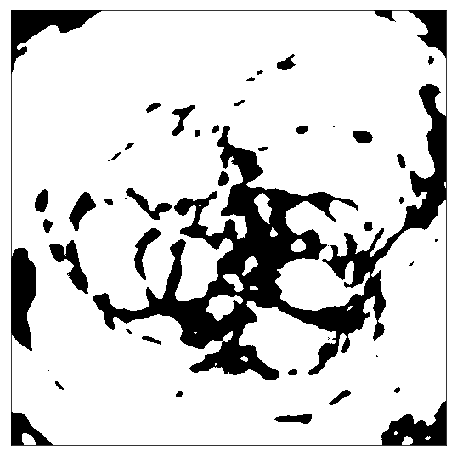

In [23]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Linear 0-1 result

In [ ]:
plt.figure(figsize=(8, 8))
# plt.suptitle(title, size=16)
plt.imshow(data_proba_visual, 
            cmap=plt.cm.Greys,
            #vmin=-vmax, vmax=vmax
          )
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# linear proba result

In [ ]:
%cd ~/Documents

import matplotlib.image as mpimg

In [ ]:
plt.figure(figsize=(8, 8))
img=mpimg.imread('edge.png')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()